In [1]:
from pyEmceeFit import *

In [4]:
#sampler,pos,prob,state,flat_samples = main(True)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys,math

font = {'family' : 'DejaVu Serif',
    'weight' : 'normal',
    'size'   : 16}
plt.rc('font', **font) #set all plot attribute defaults

def pltFormatter(fig,axList,**kwargs):
    for ax in axList:
        ax.minorticks_on()
        ax.grid(b=True,which="major",alpha=0.5)
        ax.grid(b=True,which="minor",alpha=0.3)
        legend=kwargs.get("legend")
        if legend != None:
            legend.get_frame().set_edgecolor('black') 

def trackPercent(place,totalLength,strLen): #percent output tracker
    percent = place/totalLength*100
    if math.floor(percent)==69:
        string="{:.2f} % complete -- nice".format(percent)
    else:
        string="{:.2f} % complete".format(percent)
    sys.stdout.write("\r") #this "moves the cursor" to the beginning of the I0 line
    sys.stdout.write(" "*strLen) #this "clears" whatever was on the line last time by writing whitespace
    sys.stdout.write("\r") #move the cursor back to the start again
    sys.stdout.write(string) #display the current percent we are at
    sys.stdout.flush() #flush finishes call to print() (this is like what's under the hood of print function)
    strLen=len(string) #return the new string length for next function call
    return strLen

In [9]:
SummitResults = readPickle('pyEmceeVar.p')
flat_samples,pos,prob = SummitResults

array([[2.26613622e+01, 1.88759660e+03, 2.90613587e+00, ...,
        7.75407495e-01, 6.68450697e-02, 2.37645389e-01],
       [7.11778537e+01, 1.43531875e+03, 2.66215251e-02, ...,
        9.45193956e-01, 7.89856004e-01, 5.41457727e-01],
       [5.80633058e+01, 1.41491297e+03, 2.47023772e+00, ...,
        7.86179498e-01, 2.46553026e-01, 7.47236056e-01],
       ...,
       [7.91744568e+01, 2.01890849e+03, 1.17968691e-01, ...,
        9.72353443e-01, 5.96199755e-01, 9.26741017e-01],
       [5.48483805e+01, 1.57367887e+03, 2.97876445e-01, ...,
        8.92532546e-01, 5.93164221e-01, 1.09872493e-01],
       [3.27431175e+01, 7.97846964e+02, 2.86403641e-01, ...,
        7.32182640e-01, 7.44250239e-01, 5.82424740e-01]])

In [10]:
 for θ in flat_samples[np.random.randint(len(flat_samples), size=10)]:
        print("i = {0:.2f}, rMin = {1:.2f}, MFac = {2:.2f}, rFac = {3:.2f}, f1 (sin^2) = {4:.2f}, f2 (cos^2) = {5:.2f}, f3 (sin*cos)= {6:.2f}".format(θ[0],θ[1],θ[2],θ[3],θ[4],θ[5],θ[6]))

i = 23.07, rMin = 577.06, MFac = 0.15, rFac = 2.23, f1 (sin^2) = 0.76, f2 (cos^2) = 0.94, f3 (sin*cos)= 0.83
i = 11.43, rMin = 659.75, MFac = 0.24, rFac = 1.69, f1 (sin^2) = 0.37, f2 (cos^2) = 0.12, f3 (sin*cos)= 0.77
i = 86.38, rMin = 517.49, MFac = 0.01, rFac = 3.91, f1 (sin^2) = 0.57, f2 (cos^2) = 0.41, f3 (sin*cos)= 0.12
i = 69.26, rMin = 1375.58, MFac = 0.18, rFac = 1.17, f1 (sin^2) = 0.94, f2 (cos^2) = 0.16, f3 (sin*cos)= 0.33
i = 18.51, rMin = 944.50, MFac = 5.33, rFac = 0.02, f1 (sin^2) = 0.44, f2 (cos^2) = 0.33, f3 (sin*cos)= 0.59
i = 73.59, rMin = 1412.61, MFac = 1.48, rFac = 0.06, f1 (sin^2) = 0.42, f2 (cos^2) = 0.38, f3 (sin*cos)= 0.47
i = 86.60, rMin = 1034.47, MFac = 0.20, rFac = 1.76, f1 (sin^2) = 0.35, f2 (cos^2) = 0.10, f3 (sin*cos)= 0.61
i = 74.95, rMin = 512.98, MFac = 1.05, rFac = 0.07, f1 (sin^2) = 0.26, f2 (cos^2) = 0.48, f3 (sin*cos)= 0.04
i = 88.85, rMin = 1532.34, MFac = 1.19, rFac = 0.05, f1 (sin^2) = 0.39, f2 (cos^2) = 0.30, f3 (sin*cos)= 0.41
i = 85.46, rMin

In [3]:
def plotParams(data,θList,mα=0.1):
    λCen=2.172; ν = (data[0]-λCen)/λCen*3e5
    indx=[0,1,2,6,7,8,12,13,14,18,19,20]; oindx=[3,4,5,9,10,11,15,16,17,21,22,23]
    fig,axd = plt.subplot_mosaic([['a','b','c']],figsize=(24,6))
    ax1 = axd["a"]; ax2 = axd["b"]; ax3 = axd["c"]
    ax1.get_shared_x_axes().join(ax1,ax2); ax1.get_shared_x_axes().join(ax1,ax3)
    ax2.get_shared_y_axes().join(ax2,ax3); ax3.set_yticklabels([])
    dodgerBlue=(.12,0.56,1.00)
    ax1.errorbar(ν,data[3],yerr=data[6],marker="o",ms=3,label="3C 273",markerfacecolor=dodgerBlue,markeredgecolor=dodgerBlue,linewidth=0,elinewidth=0.5,capsize=1.5,capthick=0.5,color='k')
    ax2.errorbar(ν,np.mean(np.array(data[4])[indx],axis=0),yerr=ν*0+0.07,label="3C 273",marker="o",ms=3,markerfacecolor=dodgerBlue,markeredgecolor=dodgerBlue,linewidth=0,elinewidth=0.5,capsize=1.5,capthick=0.5,color='k')
    ax3.errorbar(ν,np.mean(np.array(data[4])[oindx],axis=0),yerr=ν*0+0.07,label="3C 273",marker="o",ms=3,markerfacecolor=dodgerBlue,markeredgecolor=dodgerBlue,linewidth=0,elinewidth=0.5,capsize=1.5,capthick=0.5,color='k')
    ax1.fill_between(ν,data[3]-data[6],data[3]+data[6],color=dodgerBlue,alpha=0.5)
    ax2.fill_between(ν,np.mean(np.array(data[4])[indx],axis=0)-0.07,np.mean(np.array(data[4])[indx],axis=0)+0.07,color=dodgerBlue,alpha=0.5)
    ax3.fill_between(ν,np.mean(np.array(data[4])[oindx],axis=0)-0.07,np.mean(np.array(data[4])[oindx],axis=0)+0.07,color=dodgerBlue,alpha=0.5)
    strLen = 0; place = 1; N = len(θList)
    for θ in θList:
        i,rMin,Mfac,rFac,f1,f2,f3,pa = θ
        line,phaseList = getProfiles(ν,θ,data)
        phase = np.mean(np.array(phaseList)[indx],axis=0); phaseo = np.mean(np.array(phaseList)[oindx],axis=0)
        label = "Disk wind model ({} samples)".format(N) if place == 1 else ""
        ax1.plot(ν,line,label=label,lw=2,c='crimson',alpha=mα)
        ax2.plot(ν,phase,label=label,lw=2,c='crimson',alpha=mα)
        ax3.plot(ν,phaseo,label=label,lw=2,c='crimson',alpha=mα)
        strLen = trackPercent(place,N,strLen); place+=1
    ax1.set_title("Line profile comparison")
    ax2.set_title("Phase profile (mean on) comparison")
    ax3.set_title("Phase profile (mean off) comparison")
    ax2.set_xlabel("Velocity [km/s]")
    ax1.set_ylabel("Flux [fraction of max]")
    ax2.set_ylabel("Phase [deg]")
    l = ax2.legend(loc='upper left')
    pltFormatter(fig,[ax1,ax2,ax3],legend=l)
    fig.tight_layout()
    return fig,ax1,ax2,ax3

-79.78954018979961
100.00 % complete

(<Figure size 1728x432 with 3 Axes>,
 <AxesSubplot:label='a', title={'center':'Line profile comparison'}, ylabel='Flux [fraction of max]'>,
 <AxesSubplot:label='b', title={'center':'Phase profile (mean on) comparison'}, xlabel='Velocity [km/s]', ylabel='Phase [deg]'>,
 <AxesSubplot:label='c', title={'center':'Phase profile (mean off) comparison'}>)

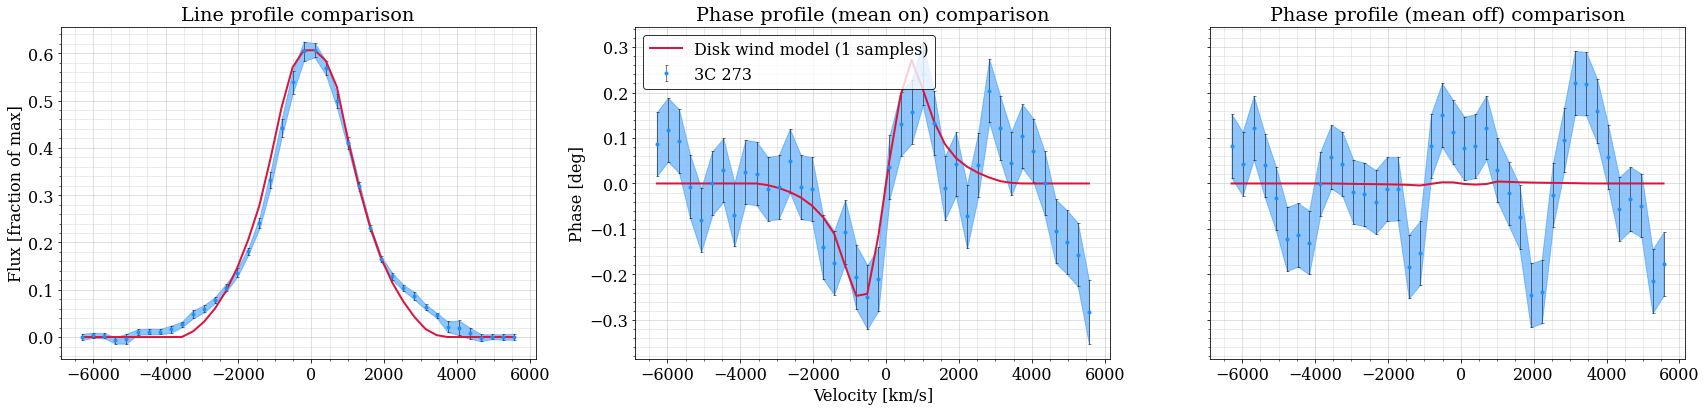

In [17]:
#making a guess at what it should be
θ = [30.,1e3,1.1,1.,0.57,0.6,0.46,342.] #i,rMin,Mfac,rFac,f1,f2,f3,pa
data = readPickle("3c273_juljanmarmay_append_gilles_specirf_wide_v6.p")
λCen = 2.172
vel = (data[0]-λCen)/λCen*3e5
print(log_prob(θ,vel,data))
plotParams(data,[θ],1)

100.00 % complete       

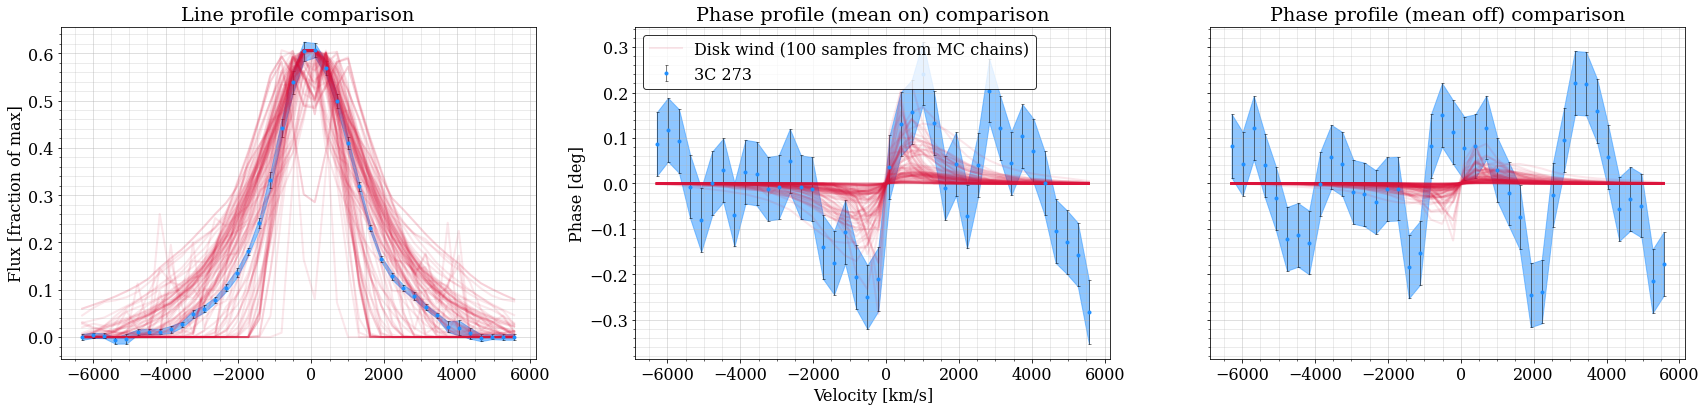

In [12]:
θList = flat_samples[np.random.randint(len(flat_samples),size=100)] #this looks like nonsense, investigate further
data = readPickle("3c273_juljanmarmay_append_gilles_specirf_wide_v6.p")
fig,ax1,ax2,ax3 = plotParams(data,θList)

In [13]:
from IPython.display import display, Math
labels=["i","rMin","MFac","rFac","f1","f2","f3"]
for i in range(len(labels)):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
prob == -np.Inf